<a href="https://colab.research.google.com/github/AngeloCarnevale/machine-learning/blob/main/%C3%81rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorítmo de Árvore de Decisão

# Importando as bibliotecas

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #classificador da árvore de decisão
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import export_graphviz #gerar a árvore de decisão
import graphviz

base = pd.read_csv('/insurance.csv')
base

base = base.drop(columns= ['Unnamed: 0'])

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [66]:
y = base.iloc[:,7].values
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

labelencoder = LabelEncoder()

for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelencoder.fit_transform(X[:,i])

y = labelencoder.fit_transform(y)

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

In [68]:
modelo = DecisionTreeClassifier(random_state=1)
modelo.fit(X_treinamento, y_treinamento)

previsoes = modelo.predict(X_teste)


[3 3 3 ... 3 0 3]


In [69]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall {recall}, F1: {f1}')

Acuracia: 0.9193333333333333, Precisão: 0.9205163849870271, Recall 0.9193333333333333, F1: 0.9197596677057858


In [70]:
dot_data = export_graphviz(modelo, out_file=None, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True) #pegando todas as colunas
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
graph.view()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.565875 to fit


'decision_tree.pdf'

Acuracia: 0.9431666666666667, Precisão: 0.9414472054287656, Recall 0.9431666666666667, F1: 0.9413415825418666


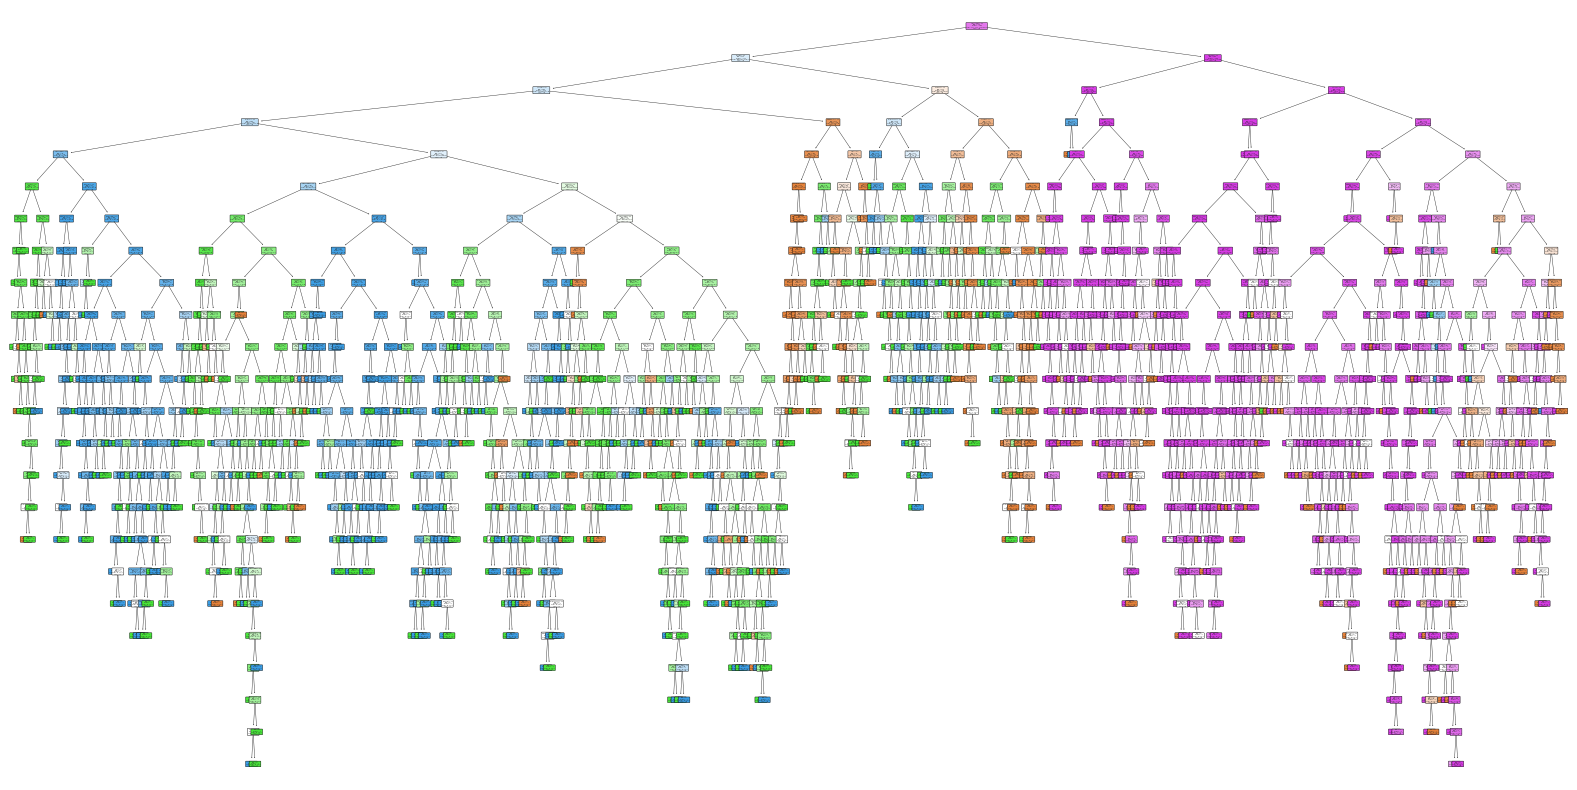

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

base = pd.read_csv('/insurance.csv')
base



base = base.drop(columns= ['Unnamed: 0'])
base
y = base.iloc[:,7].values
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values
labelencoder = LabelEncoder()
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelencoder.fit_transform(X[:,i])
y = labelencoder.fit_transform(y)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)



modelo = RandomForestClassifier(random_state=1,n_estimators=500) #n_estimators = quantas árvores aleatórias ele vai induzir (por padrão é 100)
modelo.fit(X_treinamento,y_treinamento)

previsoes = modelo.predict(X_teste)

accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall {recall}, F1: {f1}')


#impressão
tree_index = 0 #para mudar a árvore, basta mudar de index
tree_to_visualize = modelo.estimators_[tree_index] #geração da árvore a ser vista
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)
plt.show()
